# Regression homework

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('car_fuel_efficiency.csv')

In [3]:
df = df[['engine_displacement', 'horsepower', 'vehicle_weight', 'model_year', 'fuel_efficiency_mpg']]

<Axes: xlabel='fuel_efficiency_mpg', ylabel='Count'>

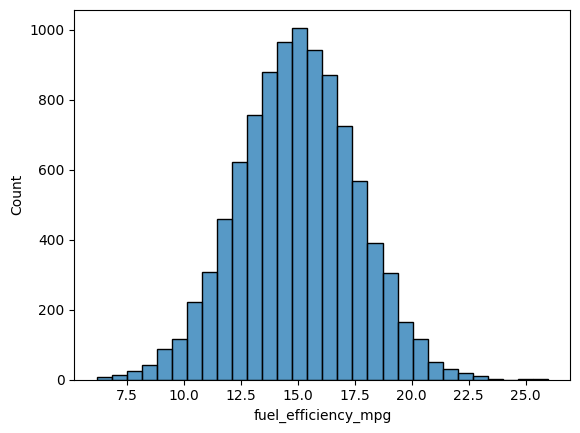

In [4]:
sns.histplot(df['fuel_efficiency_mpg'], bins=30) 

### Question 1

In [5]:
df.isnull().sum()

engine_displacement      0
horsepower             708
vehicle_weight           0
model_year               0
fuel_efficiency_mpg      0
dtype: int64

### Question 2

In [6]:
df['horsepower'].median()

np.float64(149.0)

### Question 3

<Axes: xlabel='horsepower', ylabel='Count'>

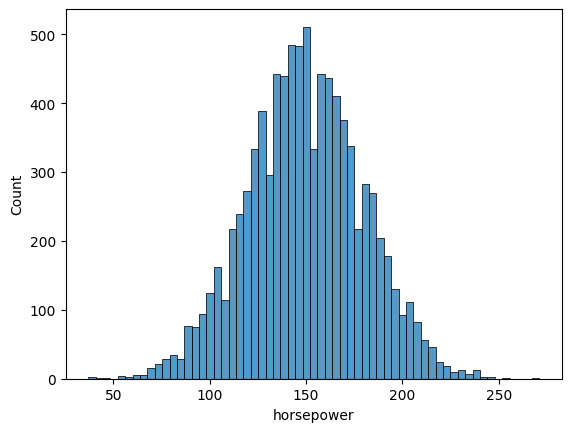

In [14]:
sns.histplot(df['horsepower'])

#### Checking how different are datasets without missing values and with missing values

In [24]:
df_missed = df.loc[df['horsepower'].isnull()]
df_without_missed = df.loc[df['horsepower'].notnull()]

engine_displacement


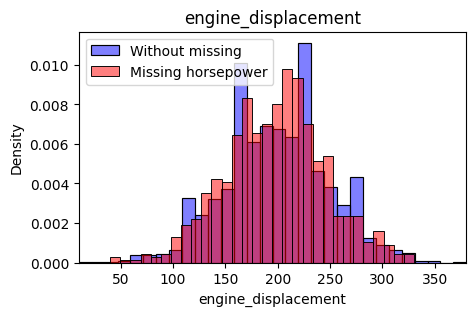

////////////////////////////////////////////
vehicle_weight


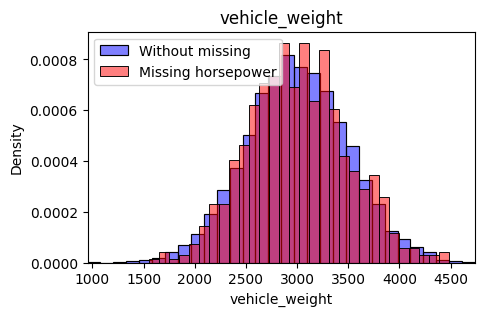

////////////////////////////////////////////
model_year


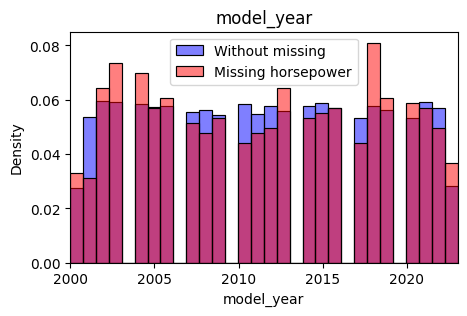

////////////////////////////////////////////
fuel_efficiency_mpg


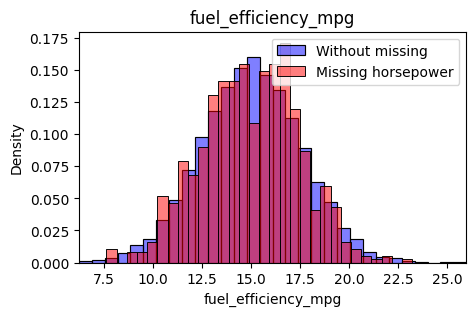

////////////////////////////////////////////


In [29]:
df_missed.head()

columns = df.columns.tolist()

for col in columns:
    if col != 'horsepower':
        print(col)
        plt.figure(figsize=(5, 3))
        min_val = df[col].min()
        max_val = df[col].max()
        sns.histplot(df_without_missed[col], bins=30, color='blue', label='Without missing', stat='density', alpha=0.5)
        sns.histplot(df_missed[col], bins=30, color='red', label='Missing horsepower', stat='density', alpha=0.5)
        plt.xlim(min_val, max_val)  # Set the same x-axis scale for both
        plt.legend()
        plt.title(col)
        plt.show()
        print('////////////////////////////////////////////')
    

seems like mean would work better, but we'll compare the training results

### Prepare and split dataset

In [17]:
def shuffle_dataset(df):
    df = df.copy()
    np.random.seed(42)

    n = len(df)

    n_val = int(0.2 * n)
    n_test = int(0.2 * n)
    n_train = n - (n_val + n_test)

    idx = np.arange(n)
    np.random.shuffle(idx)

    df_shuffled = df.iloc[idx]

    df_train = df_shuffled.iloc[:n_train].copy()
    df_val = df_shuffled.iloc[n_train:n_train+n_val].copy()
    df_test = df_shuffled.iloc[n_train+n_val:].copy()

    y_train_orig = df_train.fuel_efficiency_mpg.values
    y_val_orig = df_val.fuel_efficiency_mpg.values
    y_test_orig = df_test.fuel_efficiency_mpg.values

    y_train = np.log1p(df_train.fuel_efficiency_mpg.values)
    y_val = np.log1p(df_val.fuel_efficiency_mpg.values)
    y_test = np.log1p(df_test.fuel_efficiency_mpg.values)

    del df_train['fuel_efficiency_mpg']
    del df_val['fuel_efficiency_mpg']
    del df_test['fuel_efficiency_mpg']

    return df_train, y_train, df_val, y_val, df_test, y_test

In [23]:
df_train_means, y_train_means, df_val_means, y_val_means, df_test_means, y_test_means = shuffle_dataset(df)
df_train_zeros, y_train_zeros, df_val_zeros, y_val_zeros, df_test_zeros, y_test_zeros = shuffle_dataset(df)

In [24]:
df_train_means.shape, y_train_means.shape, df_val_means.shape, y_val_means.shape, df_test_means.shape, y_test_means.shape

((5824, 4), (5824,), (1940, 4), (1940,), (1940, 4), (1940,))

In [25]:
df_train_zeros.shape, y_train_zeros.shape, df_val_zeros.shape, y_val_zeros.shape, df_test_zeros.shape, y_test_zeros.shape

((5824, 4), (5824,), (1940, 4), (1940,), (1940, 4), (1940,))

#### Filling with zeroes and meansb

In [32]:
#Calculating the mean of horsepower column in train
horsepower_mean = df_train_means['horsepower'].mean()

df_train_means['horsepower'] = df_train_means['horsepower'].fillna(horsepower_mean)
df_val_means['horsepower'] = df_val_means['horsepower'].fillna(horsepower_mean)
df_test_means['horsepower'] = df_test_means['horsepower'].fillna(horsepower_mean)

#Filling with zeroes
df_train_zeros['horsepower'] = df_train_zeros['horsepower'].fillna(0)
df_val_zeros['horsepower'] = df_val_zeros['horsepower'].fillna(0)
df_test_zeros['horsepower'] = df_test_zeros['horsepower'].fillna(0)

In [39]:
def train_linear_regression(X, y):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    XTX_inv = np.linalg.inv(XTX)
    w = XTX_inv.dot(X.T).dot(y)
    
    return w[0], w[1:]

def rmse(y, y_pred):
    error = y_pred - y
    mse = (error ** 2).mean()
    return round(np.sqrt(mse), 2)

In [40]:
X_train_means = df_train_means.values
X_train_zeros = df_train_zeros.values

w0_means, w_means = train_linear_regression(X_train_means, y_train_means)
w0_zeros, w_zeros = train_linear_regression(X_train_zeros, y_train_zeros)

y_pred_train_means = w0_means + X_train_means.dot(w_means)
y_pred_train_zeros = w0_zeros + X_train_zeros.dot(w_zeros)

X_test_means = df_test_means.values
X_test_zeros = df_test_zeros.values
X_val_means = df_val_means.values
X_val_zeros = df_val_zeros.values

y_pred_test_means = w0_means + X_test_means.dot(w_means)
y_pred_test_zeros = w0_zeros + X_test_zeros.dot(w_zeros)

y_pred_val_means = w0_means + X_val_means.dot(w_means)
y_pred_val_zeros = w0_zeros + X_val_zeros.dot(w_zeros)

#RMSE for means
print('WITH MEANS')
print('train')
rmse_means = rmse(y_train_means, y_pred_train_means)
print(rmse_means)
print('test')
rmse_means = rmse(y_test_means, y_pred_test_means)
print(rmse_means)
print('val')
rmse_means = rmse(y_val_means, y_pred_val_means)
print(rmse_means)
print('/////////////////////////////')
rmse_val = rmse(y_val_means, y_pred_val_means)
#RMSE for zeroes
print('WITH ZEROES')
print('train')
rmse_zeros = rmse(y_train_zeros, y_pred_train_zeros)
print(rmse_zeros)
print('test')
rmse_zeros = rmse(y_test_zeros, y_pred_test_zeros)
print(rmse_zeros)
print('val')
rmse_zeros = rmse(y_val_zeros, y_pred_val_zeros)
print(rmse_zeros)
print('/////////////////////////////')


WITH MEANS
train
0.04
test
0.03
val
0.04
/////////////////////////////
WITH ZEROES
train
0.04
test
0.04
val
0.04
/////////////////////////////


results are the same for validation

### Question 4